# 0. 運行 SQL & 資料前處理

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl

In [3]:
# 1. 掛載 Google Drive 並導入必要模組
from google.colab import drive
import pandas as pd
import sqlite3

# 掛載 Google Drive
drive.mount('/content/drive')

# 2. 建立 SQLite 資料庫連接
db_path = '/content/drive/MyDrive/履歷申請/作品集/archive/olist_data.db'
db = sqlite3.connect(db_path)

# 3. 定義 CSV 檔案與對應資料表名稱
csv_files = {
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_customers_dataset.csv': 'customers',
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_geolocation_dataset.csv': 'geolocation',
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_order_items_dataset.csv': 'order_items',
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_order_payments_dataset.csv': 'order_payments',
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_order_reviews_dataset.csv': 'order_reviews',
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_orders_dataset.csv': 'orders',
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_products_dataset.csv': 'products',
    '/content/drive/MyDrive/履歷申請/作品集/archive/olist_sellers_dataset.csv': 'sellers',
    '/content/drive/MyDrive/履歷申請/作品集/archive/product_category_name_translation.csv': 'product_category_translation'
}

# 4. 讀取並匯入 CSV 檔案到 SQLite 資料庫
for file_path, table_name in csv_files.items():
    print(f'正在匯入 {table_name} 資料表...')
    df = pd.read_csv(file_path)
    # Check the dataframe before importing
    df.to_sql(table_name, db, if_exists='replace', index=False)

print('所有資料已成功匯入資料庫！')

# 5. 執行 SQL 查詢範例
def run_query(query):
    return pd.read_sql_query(query, db)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
正在匯入 customers 資料表...
正在匯入 geolocation 資料表...


<ipython-input-3-d97dde039c91>:29: DtypeWarning: Columns (6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


正在匯入 order_items 資料表...
正在匯入 order_payments 資料表...
正在匯入 order_reviews 資料表...
正在匯入 orders 資料表...
正在匯入 products 資料表...
正在匯入 sellers 資料表...
正在匯入 product_category_translation 資料表...
所有資料已成功匯入資料庫！


資料來源 https://www.kaggle.com/olistbr/brazilian-ecommerce

第一份表格名稱 (olist_customers_dataset)
第二份表格名稱 (olist_geolocation_dataset)
第三份表格名稱 (olist_order_items_dataset)
第四份表格名稱 (olist_order_payments_dataset)
第五份表格名稱 (olist_order_reviews_dataset)
第六份表格名稱 (olist_orders_dataset)
第七份表格名稱 (olist_products_dataset)
第八份表格名稱 (olist_sellers_dataset)
第九份表格名稱 (product_category_name_translation)

以下為資料 ER 圖

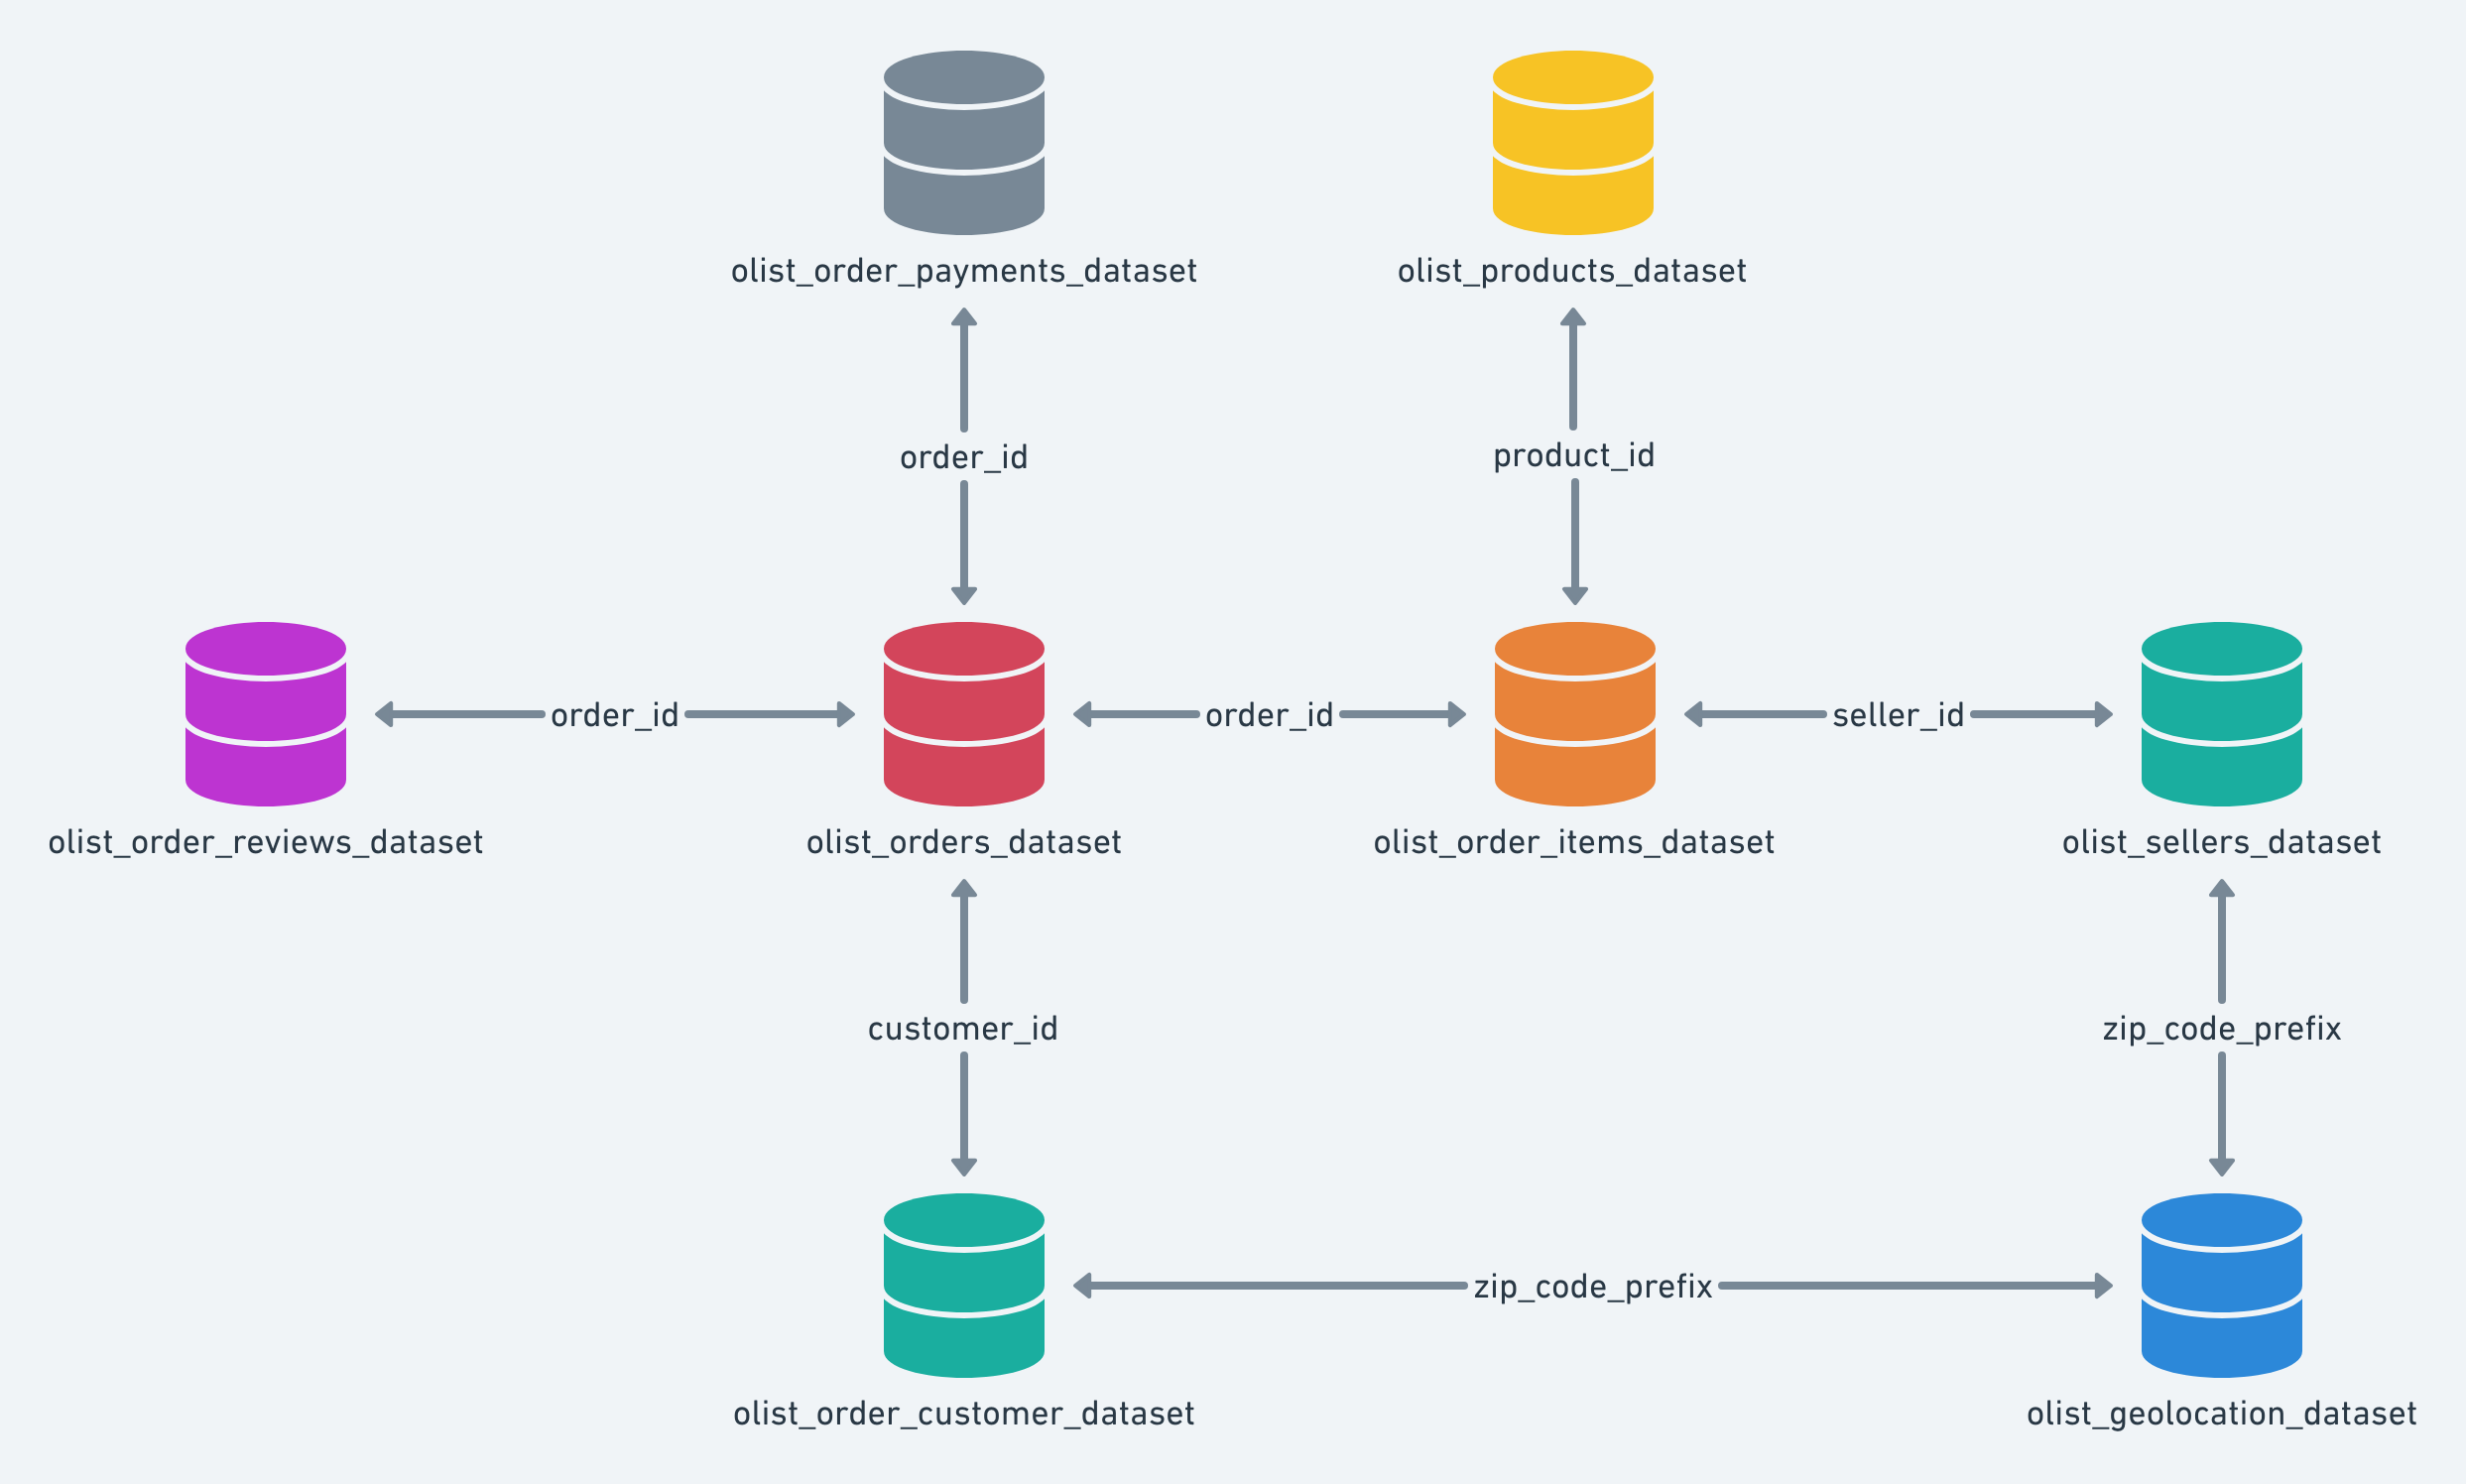

In [4]:
#簡單檢視各表格內容
import pandas as pd
from IPython.display import display


# 查詢清單
queries = [
    ("第一份表格 (customers)", "SELECT * FROM customers LIMIT 3"),
    ("第二份表格 (geolocation)", "SELECT * FROM geolocation LIMIT 3"),
    ("第三份表格 (order_items)", "SELECT * FROM order_items LIMIT 3"),
    ("第四份表格 (order_payments)", "SELECT * FROM order_payments LIMIT 3"),
    ("第五份表格 (order_reviews)", "SELECT * FROM order_reviews LIMIT 3"),
    ("第六份表格 (orders)", "SELECT * FROM orders LIMIT 3"),
    ("第七份表格 (products)", "SELECT * FROM products LIMIT 3"),
    ("第八份表格 (sellers)", "SELECT * FROM sellers LIMIT 3"),
    ("第九份表格 (product_category_translation)", "SELECT * FROM product_category_translation LIMIT 3")
]

# 執行查詢並顯示結果
for title, query in queries:
    print(title)
    result_df = run_query(query)
    display(result_df)  # 使用 display() 讓表格美觀顯示


第一份表格 (customers)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


第二份表格 (geolocation)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1001,-23.549292,-46.633559,sao paulo,SP,None,None,None,None,None,None
1,1001,-23.550498,-46.634338,sao paulo,SP,None,order,None,None,None,None
2,1001,-23.550642,-46.634410,sao paulo,SP,None,order id,name,zipcode,None,None


第三份表格 (order_items)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017/9/19 09:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017/5/3 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018/1/18 14:48,199.0,17.87


第四份表格 (order_payments)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


第五份表格 (order_reviews)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24


第六份表格 (orders)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016/09/04,2016/10/7 13:18,2016/10/18 13:14,None,2016/10/20 00:00
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016/09/05,2016/10/7 13:17,None,None,2016/10/28 00:00
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016/09/13,2016/10/7 13:16,None,None,2016/9/30 00:00


第七份表格 (products)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


第八份表格 (sellers)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


第九份表格 (product_category_translation)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


# 1. 每日銷售額

在每日銷售額的儀表板中，應該有的欄位是日期、銷售總額、銷售量
以幫助銷售主管監控每日銷售狀況與趨勢

因此需從　orders　和　order_payments 兩張表中

取得日期（order_date）、銷售總額（SUM(payment_value)）銷售總額（COUNT(orderId)）


In [5]:
Query = '''

SELECT order_purchase_timestamp AS order_date, product_category_name_english AS product_category,
SUM(payment_value) AS total_revenue,
COUNT(O.order_id) AS sales_count

FROM orders AS O
INNER JOIN customers AS C ON C.customer_id = O.customer_id
INNER JOIN order_payments AS OP ON OP.order_id = O.order_id
INNER JOIN order_items AS OI ON OI.order_id = O.order_id
INNER JOIN products AS P ON P.product_id = OI.product_id
INNER JOIN product_category_translation AS PCT ON PCT.product_category_name = P.product_category_name

GROUP BY order_date, product_category
ORDER BY total_revenue DESC

'''

run_query(Query)




,order_date,product_category,total_revenue,sales_count
0,2017/09/29,fixed_telephony,109312.64,8
1,2018/02/22,computers_accessories,55840.24,76
2,2017/08/23,auto,45593.97,25
3,2017/11/24,agro_industry_and_commerce,36910.89,7
4,2018/04/19,drinks,30956.34,14
...,...,...,...,...
18479,2018/03/23,drinks,13.87,1
18480,2017/05/17,fashion_underwear_beach,13.68,1
18481,2018/05/23,consoles_games,12.89,1
18482,2017/05/01,art,12.22,1


In [6]:
def export_query_to_excel_1(query, output_filename):
    # 執行查詢
    result_df = pd.read_sql_query(Query, db)

    # 匯出結果為 Excel 檔案
    result_df.to_excel(output_filename, index=False)

    # 下載 Excel 檔案
    # Import the necessary function from google.colab.files
    from google.colab import files
    files.download(output_filename)

    print(f"查詢結果已匯出並下載為 {output_filename}！")

export_query_to_excel_1(query, 'everyday_product_sales.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

查詢結果已匯出並下載為 everyday_product_sales.xlsx！


# 2. 地區銷售狀況
為了幫助銷售主管監控各個地區各產品的銷售狀況，表格中需有地區、產品類別、銷售量、銷售額和日期等資訊

因此需要從 geolocation、customers、orders、order_items、order_payment、product 和 product_category_translation 這些表中

取得地區（geolocation_state）、產品類別（product_category）、銷售量（sales_count）、銷售額（total_revenue）

In [7]:
Query = '''

WITH dedup_geolocation AS (
  SELECT DISTINCT geolocation_zip_code_prefix,
  MAX(geolocation_state) AS geolocation_state
  FROM geolocation
  GROUP BY geolocation_zip_code_prefix
)

SELECT order_purchase_timestamp AS order_date,
CASE WHEN G.geolocation_state IS NOT NULL THEN G.geolocation_state
    ELSE 'Unknown'
    END AS geolocation_state,
product_category_name_english AS product_category,
SUM(payment_value) AS total_revenue,
COUNT(O.order_id) AS sales_count

FROM orders AS O
INNER JOIN customers AS C ON C.customer_id = O.customer_id
LEFT JOIN dedup_geolocation AS G ON G.geolocation_zip_code_prefix = C.customer_zip_code_prefix
INNER JOIN order_payments AS OP ON OP.order_id = O.order_id
INNER JOIN order_items AS OI ON OI.order_id = O.order_id
INNER JOIN products AS P ON P.product_id = OI.product_id
INNER JOIN product_category_translation AS PCT ON PCT.product_category_name = P.product_category_name

GROUP BY order_date, geolocation_state, product_category
ORDER BY total_revenue DESC

'''

run_query(Query)

,order_date,geolocation_state,product_category,total_revenue,sales_count
0,2017/09/29,RJ,fixed_telephony,109312.64,8
1,2018/02/22,SP,computers_accessories,46949.90,34
2,2017/08/23,GO,auto,45395.98,21
3,2017/11/24,MG,agro_industry_and_commerce,36489.24,6
4,2018/04/19,RJ,drinks,30247.23,11
...,...,...,...,...,...
55785,2018/03/23,SP,drinks,13.87,1
55786,2017/05/17,SP,fashion_underwear_beach,13.68,1
55787,2018/05/23,MG,consoles_games,12.89,1
55788,2017/05/01,SP,art,12.22,1


In [8]:
def export_query_to_excel_1(query, output_filename):
    # 執行查詢
    result_df = pd.read_sql_query(Query, db)

    # 匯出結果為 Excel 檔案
    result_df.to_excel(output_filename, index=False)

    # 下載 Excel 檔案
    # Import the necessary function from google.colab.files
    from google.colab import files
    files.download(output_filename)

    print(f"查詢結果已匯出並下載為 {output_filename}！")

export_query_to_excel_1(query, 'geolocation_sales.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

查詢結果已匯出並下載為 geolocation_sales.xlsx！
